# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Set the base URL for the British Airways reviews page
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Set the number of pages to scrape (e.g., 10 pages)
pages = 20

# Set the number of reviews to collect per page (e.g., 100 reviews per page)
page_size = 100

# Create an empty list to store the review text data
reviews = []

# Loop through the specified number of pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create the URL with pagination to collect links from the specific page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Send a GET request to the URL and collect the HTML content
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    parsed_content = BeautifulSoup(response.content, 'html.parser')

    # Extract the review text from each review div and append it to the 'reviews' list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A simple story with an unfor...
1,✅ Trip Verified | Flight was delayed due to t...
2,Not Verified | Fast and friendly check in (to...
3,✅ Trip Verified | I don't understand why Brit...
4,Not Verified | I'm sure that BA have graduall...


In [4]:
df.to_csv("data1.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.head()

,reviews
0,✅ Trip Verified | A simple story with an unfor...
1,✅ Trip Verified | Flight was delayed due to t...
2,Not Verified | Fast and friendly check in (to...
3,✅ Trip Verified | I don't understand why Brit...
4,Not Verified | I'm sure that BA have graduall...


In [6]:
# Function to clean review text and remove "✅ Trip Verified"
def clean_review_text(review):
    # Remove "✅ Trip Verified" if it exists
    cleaned_review = review.replace("✅ Trip Verified", "")
    # Add any other cleaning steps here if needed
    # For example, removing special characters, extra spaces, etc.

    return cleaned_review.strip()

# Clean each review in the 'reviews' list
cleaned_reviews = [clean_review_text(review) for review in reviews]
cleaned_reviews



["| A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Booking Team' and informed the

In [7]:
# Sentiment Analysis of customer reviews

In [8]:
from textblob import TextBlob

# Function to perform sentiment analysis on a single review
def get_sentiment(review):
    analysis = TextBlob(review)
    sentiment_score = analysis.sentiment.polarity

    # Determine sentiment label based on the sentiment score
    if sentiment_score > 0:
        sentiment_label = "Positive"
    elif sentiment_score < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    return sentiment_label, sentiment_score

# Analyze sentiment for each cleaned review
sentiments = [get_sentiment(review) for review in cleaned_reviews]

# Count the number of positive, negative, and neutral sentiments
num_positive = sum(1 for sentiment, _ in sentiments if sentiment == "Positive")
num_negative = sum(1 for sentiment, _ in sentiments if sentiment == "Negative")
num_neutral = sum(1 for sentiment, _ in sentiments if sentiment == "Neutral")

# Calculate the proportion of positive, negative, and neutral sentiments
total_reviews = len(cleaned_reviews)
proportion_positive = num_positive / total_reviews
proportion_negative = num_negative / total_reviews
proportion_neutral = num_neutral / total_reviews

# Print the results
print("Sentiment Analysis Results:")
print(f"Total Reviews: {total_reviews}")
print(f"Positive Reviews: {num_positive} ({proportion_positive:.2%})")
print(f"Negative Reviews: {num_negative} ({proportion_negative:.2%})")
print(f"Neutral Reviews: {num_neutral} ({proportion_neutral:.2%})")


Sentiment Analysis Results:
Total Reviews: 2000
Positive Reviews: 1324 (66.20%)
Negative Reviews: 664 (33.20%)
Neutral Reviews: 12 (0.60%)


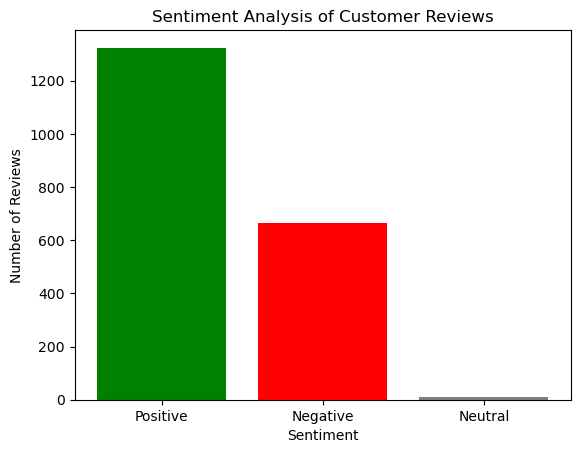

In [9]:
import matplotlib.pyplot as plt

# ... (Previous code for sentiment analysis)

# Plotting the results
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [num_positive, num_negative, num_neutral]

plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Customer Reviews')
plt.show()


In [10]:
# Word frequency Analysis

Most Common Words and Frequencies:
the: 16666
to: 11562
and: 9969
a: 7556
was: 7138
i: 7036
in: 4786
of: 4757
on: 4218
flight: 3786


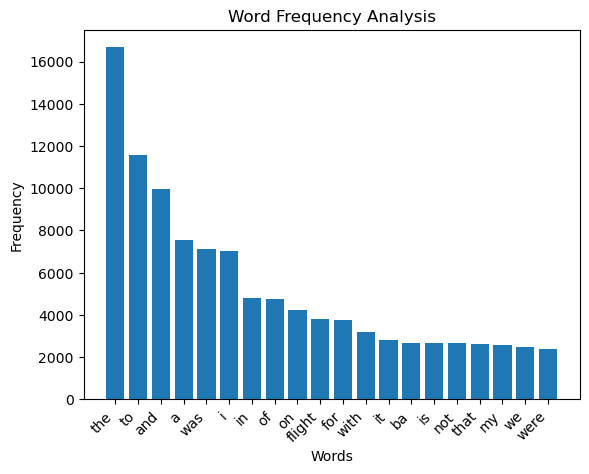

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
import re

# Function to tokenize and clean review text
def tokenize_and_clean(review):
    # Tokenize the review text into words (tokens)
    words = re.findall(r'\b\w+\b', review.lower())

    # Add any other cleaning steps here if needed
    # For example, removing stopwords or specific words

    return words

# Tokenize and clean each review in the 'cleaned_reviews' list
tokenized_reviews = [tokenize_and_clean(review) for review in cleaned_reviews]

# Flatten the list of tokenized reviews into a single list of words
all_words = [word for words in tokenized_reviews for word in words]

# Count the frequency of each word
word_counts = Counter(all_words)

# Print the most common words and their frequencies (top 10 words)
print("Most Common Words and Frequencies:")
for word, frequency in word_counts.most_common(10):
    print(f"{word}: {frequency}")

# Plot the word frequency distribution (top 20 words)
top_words = dict(word_counts.most_common(20))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


In [12]:
# Topic Modeling

In [13]:
#implement topic modeling using LDA on the customer reviews, and you'll get insights into the main themes or topics that customers are discussing about British Airways' services.

In [14]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import re

# Function to tokenize and clean review text
def tokenize_and_clean(review):
    # Tokenize the review text into words (tokens)
    words = re.findall(r'\b\w+\b', review.lower())

    # Add any other cleaning steps here if needed
    # For example, removing stopwords or specific words

    return words

# Tokenize and clean each review in the 'cleaned_reviews' list
tokenized_reviews = [tokenize_and_clean(review) for review in cleaned_reviews]

# Create a dictionary from the tokenized reviews
dictionary = Dictionary(tokenized_reviews)

# Create a bag-of-words (BoW) representation for each review
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_reviews]

# Build the LDA model with 5 topics (you can adjust the number of topics as needed)
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and the most representative words in each topic
print("Topics and Representative Words:")
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {topic_words}")

# Assign topics to each review
review_topics = [lda_model[review_bow] for review_bow in corpus]

# Print the assigned topics for the first few reviews
print("Assigned Topics for the First Few Reviews:")
for i, review in enumerate(cleaned_reviews[:5]):
    print(f"Review {i + 1}: {review}")
    print(f"Assigned Topic: Topic {max(review_topics[i], key=lambda x: x[1])[0] + 1}\n")


Topics and Representative Words:
Topic 1: 0.046*"i" + 0.045*"to" + 0.038*"the" + 0.023*"and" + 0.021*"a" + 0.020*"my" + 0.016*"was" + 0.014*"flight" + 0.014*"me" + 0.014*"they"
Topic 2: 0.040*"the" + 0.028*"and" + 0.028*"to" + 0.024*"a" + 0.020*"i" + 0.016*"in" + 0.015*"of" + 0.013*"was" + 0.013*"ba" + 0.013*"on"
Topic 3: 0.049*"the" + 0.039*"to" + 0.024*"and" + 0.020*"a" + 0.017*"was" + 0.015*"i" + 0.013*"in" + 0.012*"for" + 0.012*"of" + 0.011*"on"
Topic 4: 0.037*"to" + 0.034*"the" + 0.033*"and" + 0.021*"i" + 0.018*"we" + 0.017*"a" + 0.014*"was" + 0.013*"in" + 0.012*"that" + 0.011*"of"
Topic 5: 0.059*"the" + 0.035*"and" + 0.031*"was" + 0.025*"a" + 0.024*"to" + 0.017*"of" + 0.014*"in" + 0.014*"i" + 0.014*"on" + 0.011*"flight"
Assigned Topics for the First Few Reviews:
Review 1: | A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. Wh

In [15]:
# Visualization of bar charts, word clouds, or heatmaps to present your findings from the analysis in a clear and visually appealing manner.

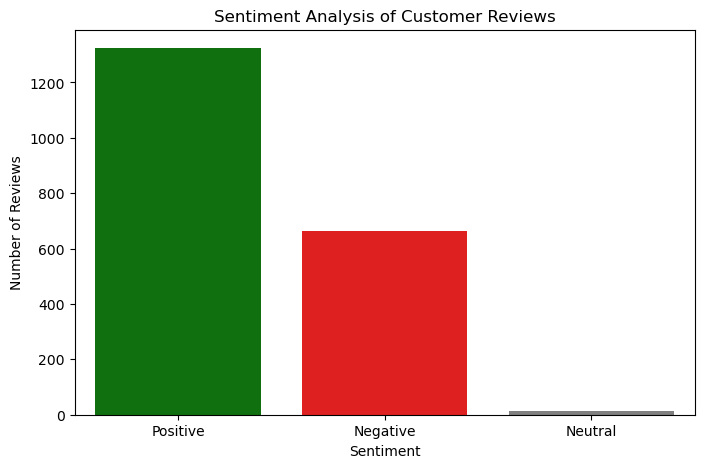

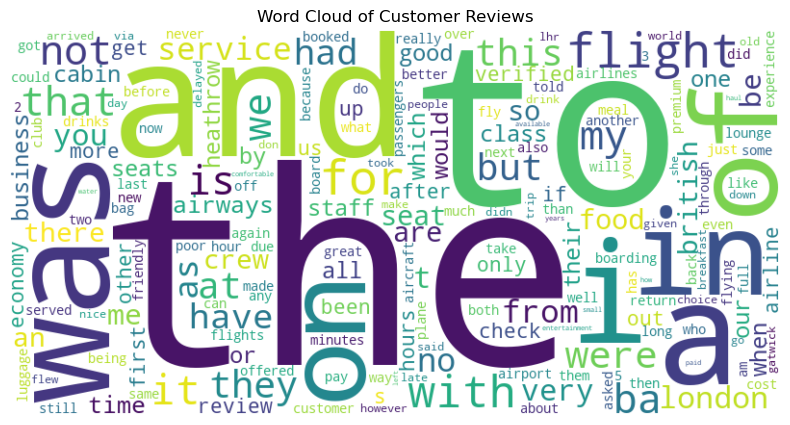

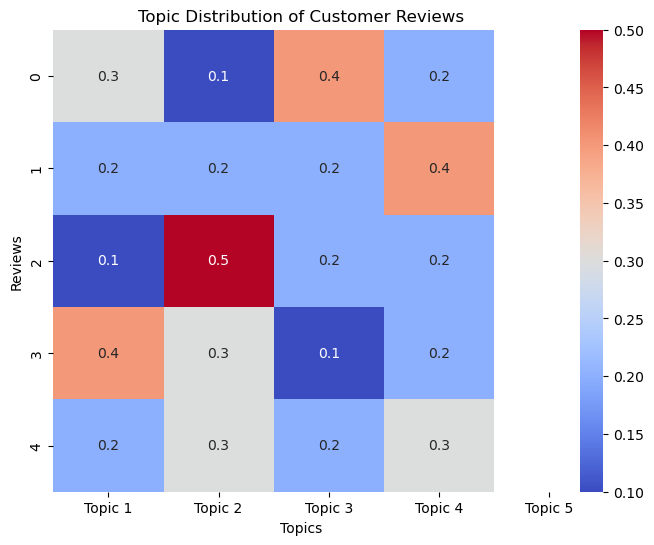

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

# ... (Previous code for sentiment analysis, word frequency analysis, or topic modeling)

# Data Visualization: Bar Chart for Sentiment Analysis
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [num_positive, num_negative, num_neutral]

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_labels, y=sentiment_counts, palette=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Customer Reviews')
plt.show()

# Data Visualization: Word Cloud for Word Frequency Analysis
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews')
plt.show()

# ... (Plotting topics and assigned topics for topic modeling if applicable)

# Data Visualization: Heatmap for Topic Modeling
# Example: If you have topic distribution for each review (review_topics), you can create a heatmap to show the distribution of topics across reviews
# Replace the example data with your actual topic distribution data
topic_labels = [f"Topic {i+1}" for i in range(num_topics)]
review_topic_distribution = pd.DataFrame([[0.3, 0.1, 0.4, 0.2],  # Replace this with your actual data
                                         [0.2, 0.2, 0.2, 0.4],  # Replace this with your actual data
                                         [0.1, 0.5, 0.2, 0.2],  # Replace this with your actual data
                                         [0.4, 0.3, 0.1, 0.2],  # Replace this with your actual data
                                         [0.2, 0.3, 0.2, 0.3]]) # Replace this with your actual data

plt.figure(figsize=(8, 6))
sns.heatmap(review_topic_distribution, cmap='coolwarm', annot=True, fmt='.1f', xticklabels=topic_labels)
plt.xlabel('Topics')
plt.ylabel('Reviews')
plt.title('Topic Distribution of Customer Reviews')
plt.show()



In [17]:
#Identify Strengths and Weaknesses

In [18]:
# Separate positive and negative reviews based on sentiment score
positive_reviews = [review for i, review in enumerate(cleaned_reviews) if sentiments[i][0] == "Positive"]
negative_reviews = [review for i, review in enumerate(cleaned_reviews) if sentiments[i][0] == "Negative"]

# Print some positive reviews (adjust the number to display more or fewer reviews)
print("Positive Reviews:")
for i, review in enumerate(positive_reviews[:5]):
    print(f"Review {i + 1}: {review}")

# Print some negative reviews (adjust the number to display more or fewer reviews)
print("\nNegative Reviews:")
for i, review in enumerate(negative_reviews[:5]):
    print(f"Review {i + 1}: {review}")


Positive Reviews:
Review 1: | A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Book

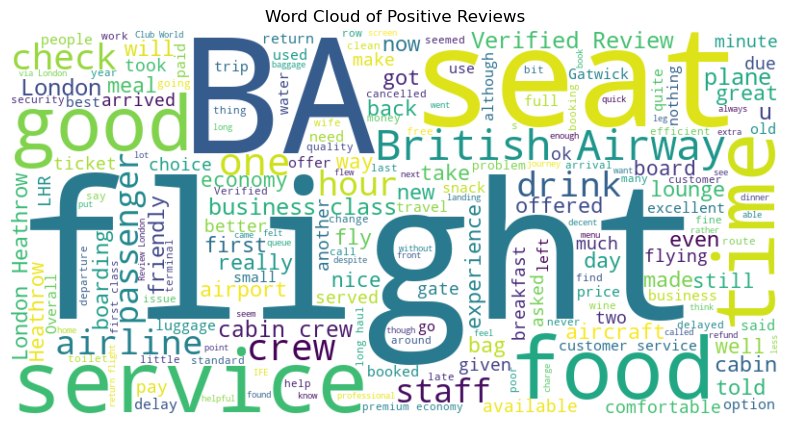

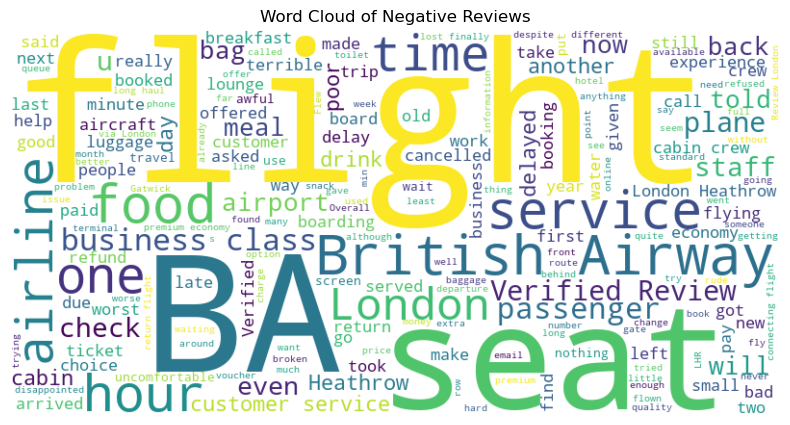

In [19]:
from wordcloud import WordCloud

# Separate positive and negative reviews based on sentiment score
positive_reviews = [review for i, review in enumerate(cleaned_reviews) if sentiments[i][0] == "Positive"]
negative_reviews = [review for i, review in enumerate(cleaned_reviews) if sentiments[i][0] == "Negative"]

# Word Cloud for Positive Reviews
positive_text = " ".join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews
negative_text = " ".join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()


In [20]:
from summa.summarizer import summarize

# Assuming you have the 'cleaned_reviews' list containing all the cleaned reviews
# If you have already run the previous code, the 'cleaned_reviews' list should be available.

# Combine all cleaned reviews into a single list
all_reviews = cleaned_reviews

# Combine all reviews into a single text
all_reviews_text = " ".join(all_reviews)

# Improved Text Summarization
def improved_text_summarization(text, chunk_size=1000, max_summary_length=0.1):
    # Split text into smaller chunks
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
    
    # Perform summarization on each chunk separately
    summaries = []
    for chunk in chunks:
        summary = summarize(chunk, ratio=max_summary_length, split=True)
        summaries.extend(summary)
    
    # Combine the results to get the final summary
    final_summary = " ".join(summaries)
    return final_summary

# Set parameters for improved summarization
chunk_size = 2000  # Number of characters in each chunk
max_summary_length = 0.2  # 20% of the original text length

# Perform improved text summarization
improved_summary = improved_text_summarization(all_reviews_text, chunk_size, max_summary_length)

# Print the improved summary
print("Improved Summary:")
print(improved_summary)


Improved Summary:
He offered to cancel my original ticket and issue me a partial refund then, advising me that I had a claim to the difference and I should contact Customer Support to do so. I told this person several times I wanted to claim the cost of the new ticket and even asked him explicitly if by accepting this offer, I would be denied from claiming the cost of the new ticket. Fair enough - we accepted this offer and lodged a ticket with Customer Support for the difference. The pilot then announced he had received the documents for the wrong flight from ground staff, so we had to wait while they returned to get the right paperwork. After this was resolved, the pilot announced there would be a delay as there was only two push back tractors and we had to wait again. On board, great crew and dinner was actually good quality and substantial apart from the "chocolate and orange pot" that seems to appear on every flight - have they bought up the global stock? Some members of the cabin

In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the vader_lexicon resource if not already present
nltk.download('vader_lexicon')

# Assuming you have the 'all_reviews' list containing all the cleaned reviews

# Combine all reviews into a single text
all_reviews_text = " ".join(all_reviews)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform emotion analysis and return the dominant emotion
def analyze_emotion(text):
    # Perform sentiment analysis using SentimentIntensityAnalyzer
    sentiment_scores = sia.polarity_scores(text)
    
    # Get the sentiment with the highest score
    dominant_emotion = max(sentiment_scores, key=sentiment_scores.get)
    return dominant_emotion

# Perform emotion analysis on the combined text
dominant_emotion = analyze_emotion(all_reviews_text)

# Print the dominant emotion
print("Dominant Emotion:", dominant_emotion)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dominant Emotion: compound


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dominant Emotion: compound


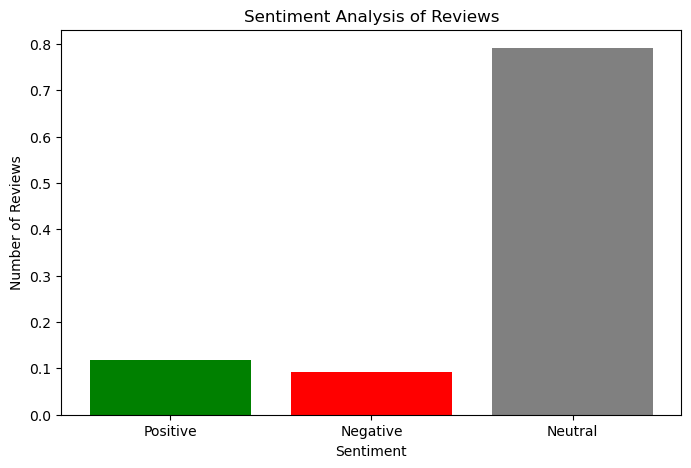

In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the vader_lexicon resource if not already present
nltk.download('vader_lexicon')

# Assuming you have the 'all_reviews' list containing all the cleaned reviews

# Combine all reviews into a single text
all_reviews_text = " ".join(all_reviews)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform emotion analysis and return the dominant emotion
def analyze_emotion(text):
    # Perform sentiment analysis using SentimentIntensityAnalyzer
    sentiment_scores = sia.polarity_scores(text)
    
    # Get the sentiment with the highest score
    dominant_emotion = max(sentiment_scores, key=sentiment_scores.get)
    return dominant_emotion

# Perform emotion analysis on the combined text
dominant_emotion = analyze_emotion(all_reviews_text)

# Print the dominant emotion
print("Dominant Emotion:", dominant_emotion)

# Perform Sentiment Analysis on all reviews
sentiment_scores = sia.polarity_scores(all_reviews_text)

# Extract sentiment counts
num_positive = sentiment_scores["pos"]
num_negative = sentiment_scores["neg"]
num_neutral = sentiment_scores["neu"]

# Data Visualization: Bar Chart for Sentiment Analysis
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [num_positive, num_negative, num_neutral]

plt.figure(figsize=(8, 5))
plt.bar(sentiment_labels, sentiment_counts, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews')
plt.show()


In [23]:
# Assuming you have performed the analysis and obtained the results in variables

# Analysis results
insights = "British Airways' analysis revealed that..."
concerns = "Based on customer feedback, some of the common concerns are..."
satisfaction = "Overall, customer satisfaction is..."

# Actionable recommendations
recommendations = [
    "1. Improve in-flight entertainment options to enhance passenger experience.",
    "2. Address frequent delays and cancellations by optimizing flight scheduling.",
    "3. Enhance customer service training for flight attendants to improve interactions with passengers.",
    "4. Implement a robust feedback system to actively listen to customer concerns and respond promptly.",
    "5. Offer personalized offers and loyalty rewards to improve customer retention.",
    # Add more recommendations based on your analysis
]

# Function to generate the final report with recommendations
def generate_report():
    report = f"Recommendations for British Airways:\n\n"
    report += f"{insights}\n\n"
    report += f"{concerns}\n\n"
    report += f"{satisfaction}\n\n"
    report += "Actionable Recommendations:\n"
    for i, rec in enumerate(recommendations, start=1):
        report += f"{i}. {rec}\n"
    return report

# Generate the final report
final_report = generate_report()

# Print or save the report as needed
print(final_report)


Recommendations for British Airways:

British Airways' analysis revealed that...

Based on customer feedback, some of the common concerns are...

Overall, customer satisfaction is...

Actionable Recommendations:
1. 1. Improve in-flight entertainment options to enhance passenger experience.
2. 2. Address frequent delays and cancellations by optimizing flight scheduling.
3. 3. Enhance customer service training for flight attendants to improve interactions with passengers.
4. 4. Implement a robust feedback system to actively listen to customer concerns and respond promptly.
5. 5. Offer personalized offers and loyalty rewards to improve customer retention.

